## Reading in the Datasets

In [45]:
# reading in articles.B2M.csv
import pandas as pd
from pathlib import Path

# adjust the path based on actual file location
articles = pd.read_csv('articles.B2M.csv')  

articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."


In [46]:
# reading in authors.B2M.csv
authors = pd.read_csv('authors.B2M.csv')
authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation
0,10575721,1,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10575721,2,P,Calas,P,NaN
2,10575721,3,A,Mouttet,A,NaN
3,10617805,1,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
4,10617805,2,I,Serre,I,NaN


In [47]:
# reading in paper_counts.csv
paper_counts = pd.read_csv('paper_counts.csv')
paper_counts.head()

,Year,Count
0,1799,1
1,1801,1
2,1802,1
3,1805,1
4,1866,1


## Initial Data Analysis

In [48]:
# summary of columns in articles
articles.info()
# mostly non-null except for a few affiliations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    object
 5   Location                665 non-null    object
 6   Year                    665 non-null    int64 
 7   FirstAuthorForename     665 non-null    object
 8   FirstAuthorLastname     665 non-null    object
 9   FirstAuthorInitials     665 non-null    object
 10  FirstAuthorAffiliation  659 non-null    object
dtypes: int64(2), object(9)
memory usage: 57.3+ KB


In [49]:
authors.info()
# affiliations and a few initials are null - will need to drop these rows later

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               5797 non-null   int64 
 1   AuthorN            5797 non-null   int64 
 2   AuthorForename     5796 non-null   object
 3   AuthorLastname     5797 non-null   object
 4   AuthorInitials     5793 non-null   object
 5   AuthorAffiliation  4422 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.9+ KB


In [50]:
paper_counts.info()
# all non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    143 non-null    int64
 1   Count   143 non-null    int64
dtypes: int64(2)
memory usage: 2.4 KB


## Most Active Researchers

Who appears the most in authors.csv?

In [51]:
# who appears most frequently as an author?
# will need to merge 'AuthorLastname' and 'AuthorInitials' columns to get full names
authors['FullName'] = authors['AuthorLastname'] + ', ' + authors['AuthorInitials']
author_totals = authors['FullName'].value_counts()

# using head() to see top 10 most frequent authors
author_totals.head(10)  

FullName
Wang, Y     17
Wang, X     16
Zhang, Y    13
Li, Y       13
Wang, J     12
Zhang, H    12
Wang, Z     10
Liu, Y       9
Li, L        9
Wang, Q      9
Name: count, dtype: int64

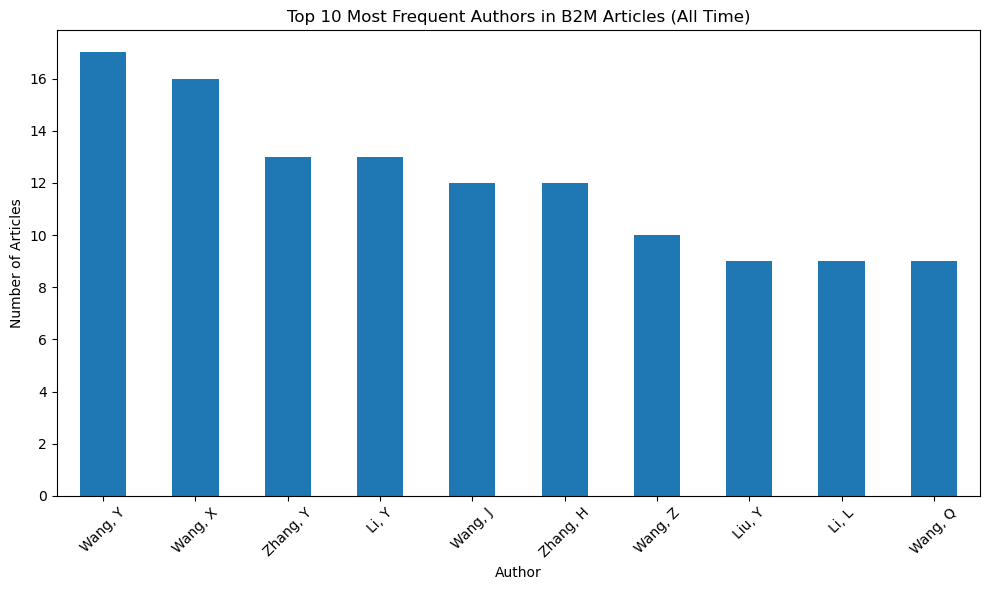

In [52]:
# plotting this data in a bar chart
import matplotlib.pyplot as plt
top_authors = author_totals.head(10)
top_authors.plot(kind='bar', figsize=(10,6))
plt.title('Top 10 Most Frequent Authors in B2M Articles (All Time)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can compare this to how frequently each author appears since 2020 (regardless of authorship position).

'Year' is in 'articles.csv'.

In [53]:
# new dataframe with articles from 2020 onwards
recent_articles = articles[articles['Year'] >= 2020]
recent_articles.head()

,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
415,30862937,Towards precision medicine for stress disorder...,The biological fingerprint of environmental ad...,1476-5578,Molecular psychiatry,(25) 918-938,2020,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S..."
436,31425267,"Removal of Urea, β2-Microglobulin, and Indoxyl...","In this study, simultaneous removal assessment...",1538-943X,ASAIO journal (American Society for Artificial...,(66) 698-705,2020,Kai,Lauri,K,"From the Department of Health Technologies, Ta..."
451,31729180,Knockout of beta-2 microglobulin reduces stem ...,Generating universal human umbilical mesenchym...,1582-4934,Journal of cellular and molecular medicine,(24) 695-710,2020,Yuqing,Zhang,Y,Institute for Cardiovascular Science & Departm...
452,31733031,"Triple (GGTA1, CMAH, B2M) modified pigs expres...",Porcine xenografts lacking swine leukocyte ant...,1600-6143,American journal of transplantation : official...,(20) 988-998,2020,Rabea,Hein,R,"Transplant Laboratory, Department of General-,..."
453,31782146,New prognosis score including absolute lymphoc...,The International Prognostic Index (IPI) is th...,1365-2141,British journal of haematology,(188) 888-897,2020,Leyre,Bento,L,"Hospital Universitario Son Espases, IdISBa, Pa..."


In [54]:
# new dataframe from authors where PMID is in recent_articles
recent_authors = authors[authors['PMID'].isin(recent_articles['PMID'])]
recent_authors.head()

,PMID,AuthorN,AuthorForename,AuthorLastname,AuthorInitials,AuthorAffiliation,FullName
3239,30862937,1,H,Le-Niculescu,H,"Department of Psychiatry, Indiana University S...","Le-Niculescu, H"
3240,30862937,2,K,Roseberry,K,"Department of Psychiatry, Indiana University S...","Roseberry, K"
3241,30862937,3,D F,Levey,DF,"Department of Psychiatry, Indiana University S...","Levey, DF"
3242,30862937,4,J,Rogers,J,"Department of Psychiatry, Indiana University S...","Rogers, J"
3243,30862937,5,K,Kosary,K,"Department of Psychiatry, Indiana University S...","Kosary, K"


In [55]:
# counting most frequent authors in recent_articles
recent_author_totals = recent_authors['FullName'].value_counts()
recent_author_totals.head(10)

FullName
Wang, X     9
Li, Y       8
Zhang, H    7
Wang, Z     7
Wang, J     7
Wang, Y     7
Li, L       6
Zhou, Y     6
Zhang, Y    6
Zhang, X    5
Name: count, dtype: int64

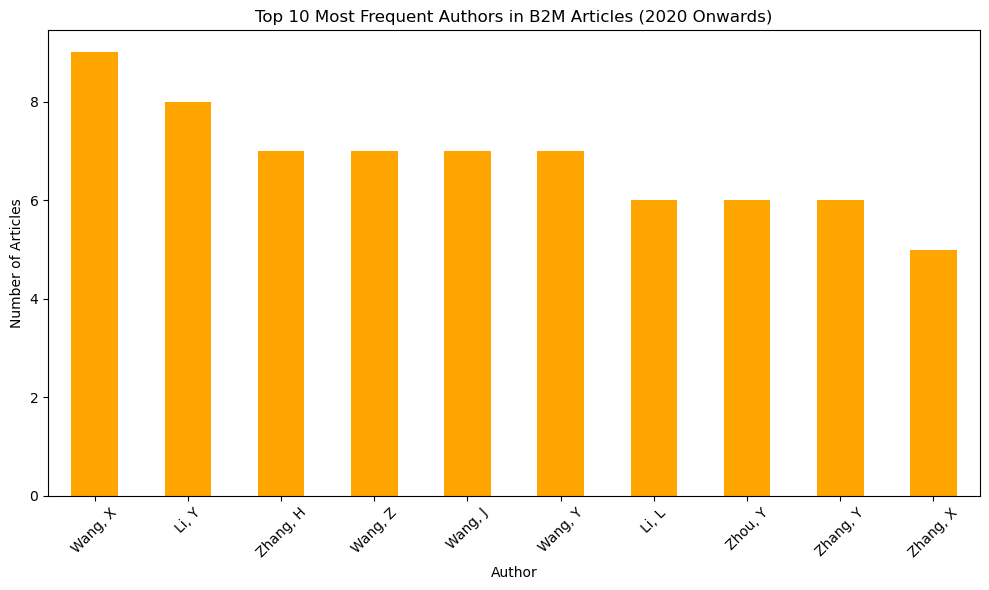

In [56]:
# plotting the top 10 recent authors
top_recent_authors = recent_author_totals.head(10)
top_recent_authors.plot(kind='bar', figsize=(10,6), color='orange')
plt.title('Top 10 Most Frequent Authors in B2M Articles (2020 Onwards)')
plt.xlabel('Author')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

With these two barcharts, we can see that some researchers have dominated research historically, having a high total number of B2M-related articles. However a partially different set of researchers have been most active in the field since 2020.

Using first name initials could slightly limit this insight, as some people may share a surname and first initial - two different people may have been rolled into one bar as the same person.

However, the first name initials column had fewer typos than the full first name column, so should generally be more reliable.

## Change in Influence

Given we are using number of articles as a proxy for influence and activity as a researcher of B2M, then change in the top 10 rankings should indicate a change in influence.

In [57]:
# collecting all author names in top_authors and top_recent_authors, and then creating a table with their 'all time' rank and 'recent' rank
all_top_authors = set(top_authors.index).union(set(top_recent_authors.index))

ranking_table = []

for author in all_top_authors:
    all_time_rank = top_authors.index.get_loc(author) + 1 if author in top_authors.index else None
    recent_rank = top_recent_authors.index.get_loc(author) + 1 if author in top_recent_authors.index else None
    ranking_table.append({
        'Author': author,
        'AllTimeRank': all_time_rank,
        'RecentRank': recent_rank
    })
    
ranking_df = pd.DataFrame(ranking_table)
ranking_df = ranking_df.sort_values(by=['AllTimeRank', 'RecentRank'], na_position='last')
ranking_df

# adding change in rank to the dataframe
ranking_df['RankChange'] = ranking_df['AllTimeRank'] - ranking_df['RecentRank']
ranking_df

,Author,AllTimeRank,RecentRank,RankChange
11,"Wang, Y",1.0,6.0,-5.0
0,"Wang, X",2.0,1.0,1.0
4,"Zhang, Y",3.0,9.0,-6.0
1,"Li, Y",4.0,2.0,2.0
8,"Wang, J",5.0,5.0,0.0
7,"Zhang, H",6.0,3.0,3.0
10,"Wang, Z",7.0,4.0,3.0
9,"Liu, Y",8.0,NaN,NaN
5,"Li, L",9.0,7.0,2.0
3,"Wang, Q",10.0,NaN,NaN


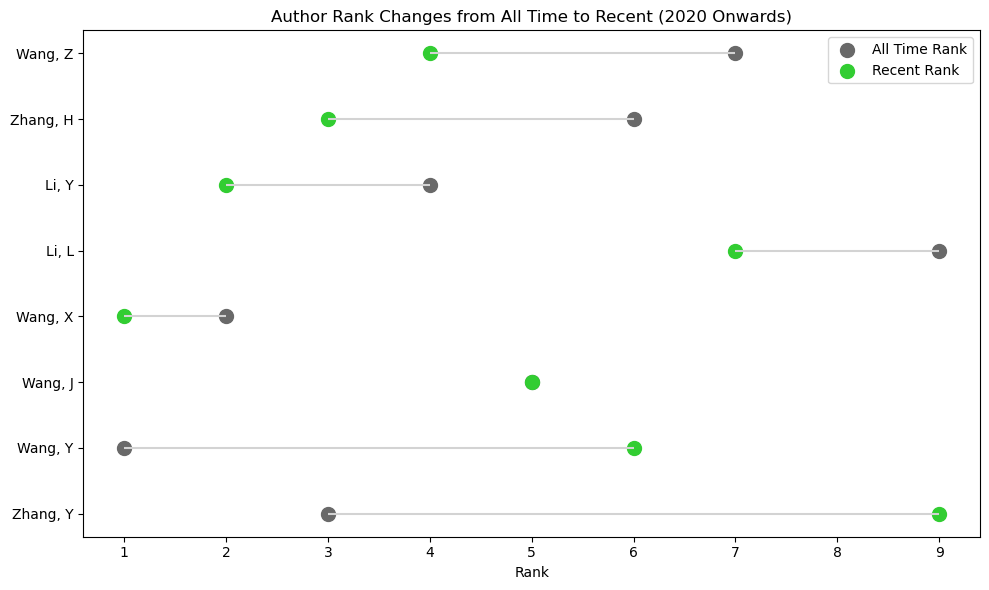

In [71]:
# dumbell plot to visualize rank changes
import numpy as np
fig, ax = plt.subplots(figsize=(10, 6))
y_positions = np.arange(len(ranking_df))
ax.hlines(y=y_positions, xmin=ranking_df['AllTimeRank'], xmax=ranking_df['RecentRank'], color='lightgray')
ax.scatter(ranking_df['AllTimeRank'], y_positions, color='dimgrey', label='All Time Rank', s=100)
ax.scatter(ranking_df['RecentRank'], y_positions, color='limegreen', label='Recent Rank', s=100)
ax.set_yticks(y_positions)
ax.set_yticklabels(ranking_df['Author'])
ax.invert_yaxis()
ax.set_xlabel('Rank')
ax.set_title('Author Rank Changes from All Time to Recent (2020 Onwards)')
ax.legend()
plt.tight_layout()
plt.show()

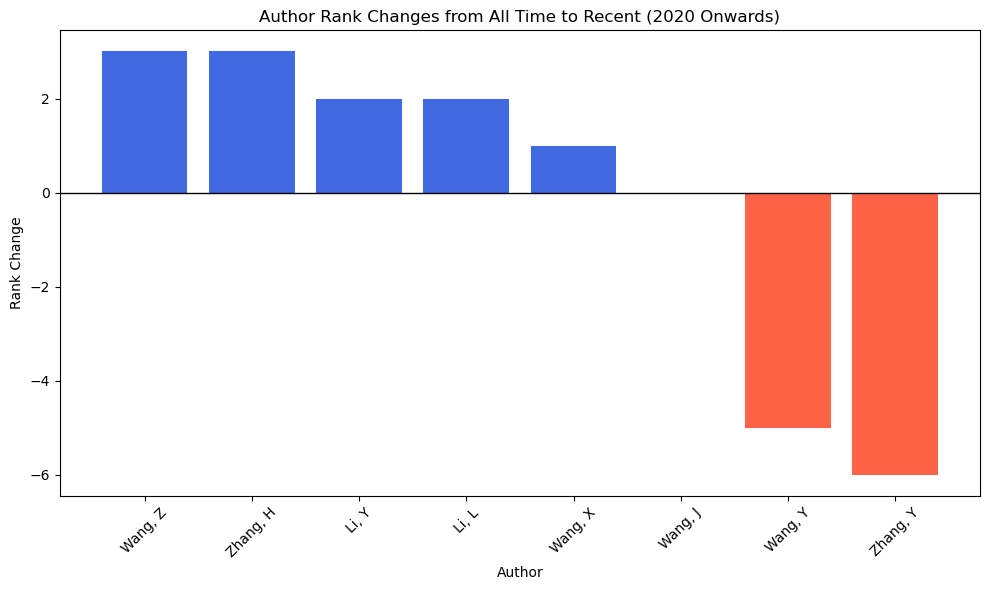

In [68]:
# bar chart of rank changes - positive values are blue, negative values are red
ranking_df = ranking_df.dropna(subset=['RankChange'])
ranking_df = ranking_df.sort_values(by='RankChange', ascending=False)
plt.figure(figsize=(10,6))
colors = ['royalblue' if x > 0 else 'tomato' for x in ranking_df['RankChange']]
plt.bar(ranking_df['Author'], ranking_df['RankChange'], color=colors)
plt.axhline(y=0, color='black', linewidth=1)
plt.title('Author Rank Changes from All Time to Recent (2020 Onwards)')
plt.xlabel('Author')
plt.ylabel('Rank Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Shortlist

Using these analyses, we can reasonably shortlist 7 researchers. 6 of them have actively increased their B2M research since 2020, relative to others. And 1 is the original 'all time' top researcher, although they dropped off their research since 2020 and fell down the ranking.

In [73]:
# creating a new dataframe with only authors who improved or maintained their rank, and Wang Y
improved_authors = ranking_df[(ranking_df['RankChange'] >= 0) | (ranking_df['Author'] == 'Wang, Y')]
improved_authors

,Author,AllTimeRank,RecentRank,RankChange
10,"Wang, Z",7.0,4.0,3.0
7,"Zhang, H",6.0,3.0,3.0
1,"Li, Y",4.0,2.0,2.0
5,"Li, L",9.0,7.0,2.0
0,"Wang, X",2.0,1.0,1.0
8,"Wang, J",5.0,5.0,0.0
11,"Wang, Y",1.0,6.0,-5.0


We can now use PMID to see which papers all of these 7 authors worked on, and see if there is any overlap/collaboration.